In [42]:
from matplotlib import pyplot as plt
from pandas import read_excel, concat
import seaborn as sb
from statsmodels.graphics.mosaicplot import mosaic
import numpy as np

In [39]:
plt.rcParams["font.family"] = 'Malgun Gothic'
#plt.rcParams["font.family"] = 'AppleGothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (7, 4)
plt.rcParams["axes.unicode_minus"] = False

In [40]:
df = read_excel("C:\\Users\\User\\Desktop\\궁둥박사\\BigdatamegaIT\\수업내용\\D_탐색적_데이터\\01_데이터_시각화/mpg.xlsx", index_col = 'id')
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
id,,,,,,,,,,,
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize


# 문제 1.

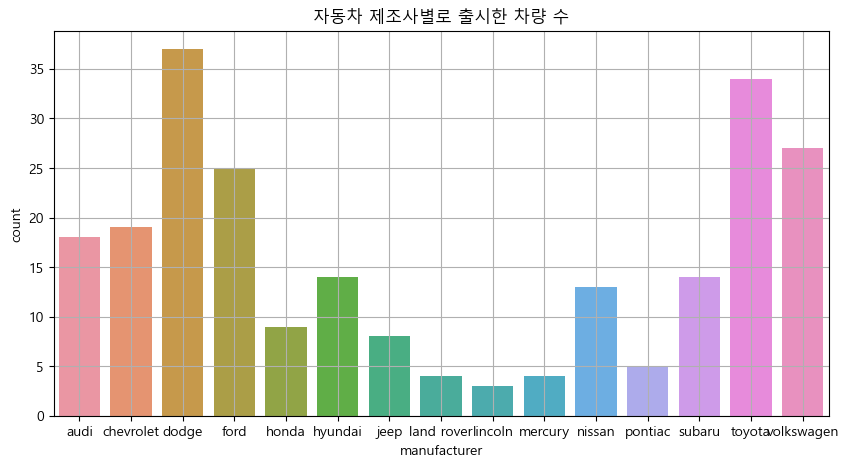

In [16]:
sb.countplot(data = df, x = 'manufacturer')
plt.title("자동차 제조사별로 출시한 차량 수")
plt.rcParams["figure.figsize"] = (22, 10)
plt.grid()
plt.show()
plt.close()

# 문제 02.

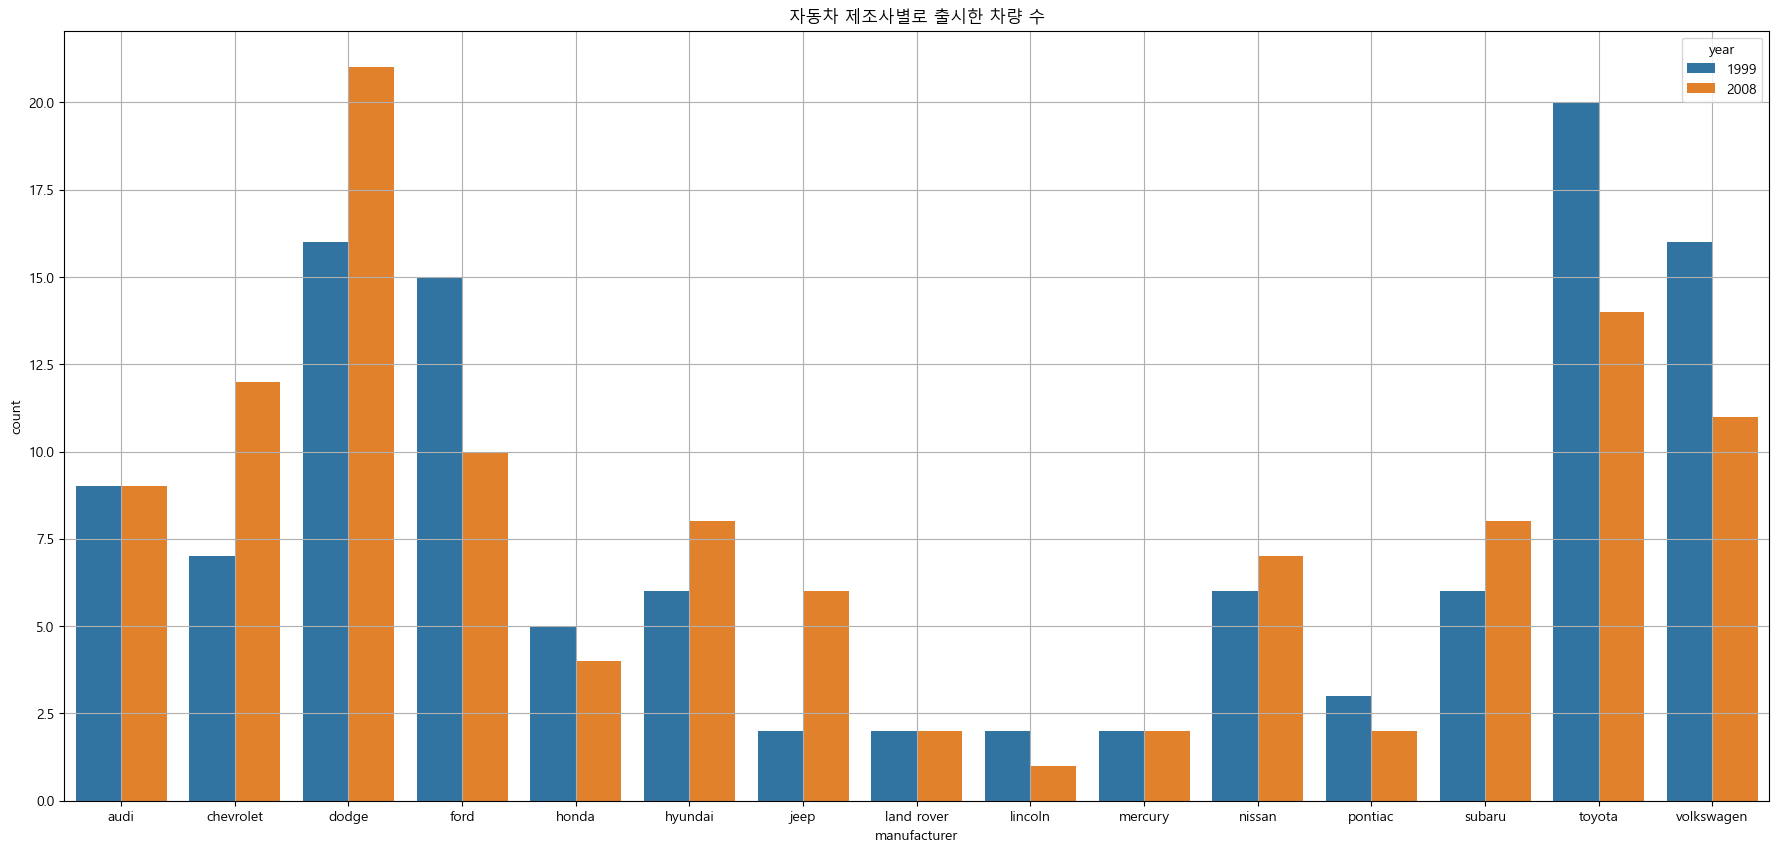

In [17]:
sb.countplot(data = df, x = 'manufacturer', hue = 'year')
plt.title("자동차 제조사별로 출시한 차량 수")
plt.rcParams["figure.figsize"] = (15, 10)
plt.grid()
plt.show()
plt.close()

# 문제 3

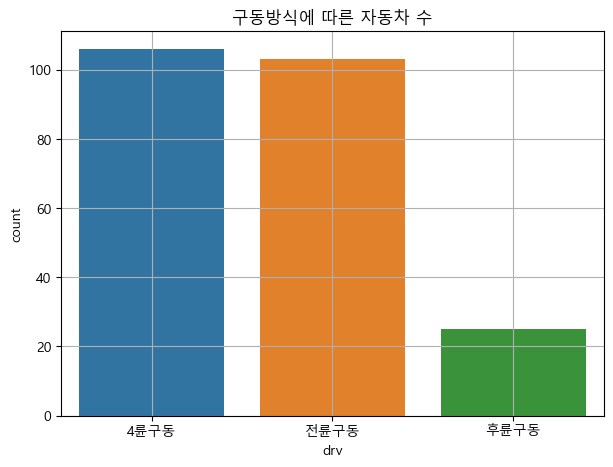

In [19]:
sb.countplot(data = df, x = 'drv')
plt.title("구동방식에 따른 자동차 수")
plt.rcParams["figure.figsize"] = (7, 5)

plt.xticks([0, 1, 2], ['4륜구동', '전륜구동', '후륜구동'])
plt.grid()
plt.show()
plt.close()

# 문제 4

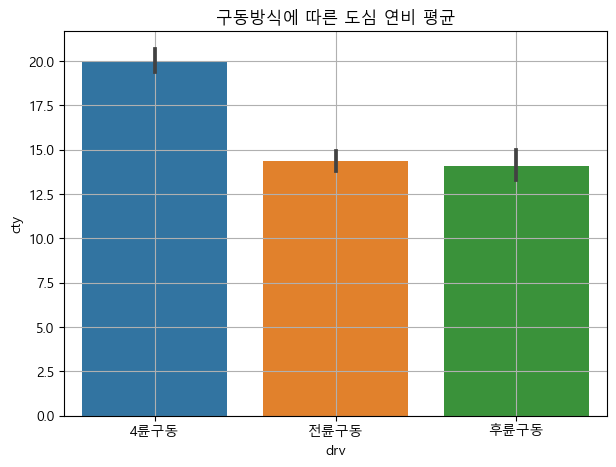

In [20]:
sb.barplot(data = df, x = 'drv', y = 'cty')
plt.title("구동방식에 따른 도심 연비 평균")
plt.xticks([0, 1, 2], ['4륜구동', '전륜구동', '후륜구동'])
plt.rcParams["figure.figsize"] = (10, 5)
plt.grid()
plt.show()
plt.close()

# 문제 5.

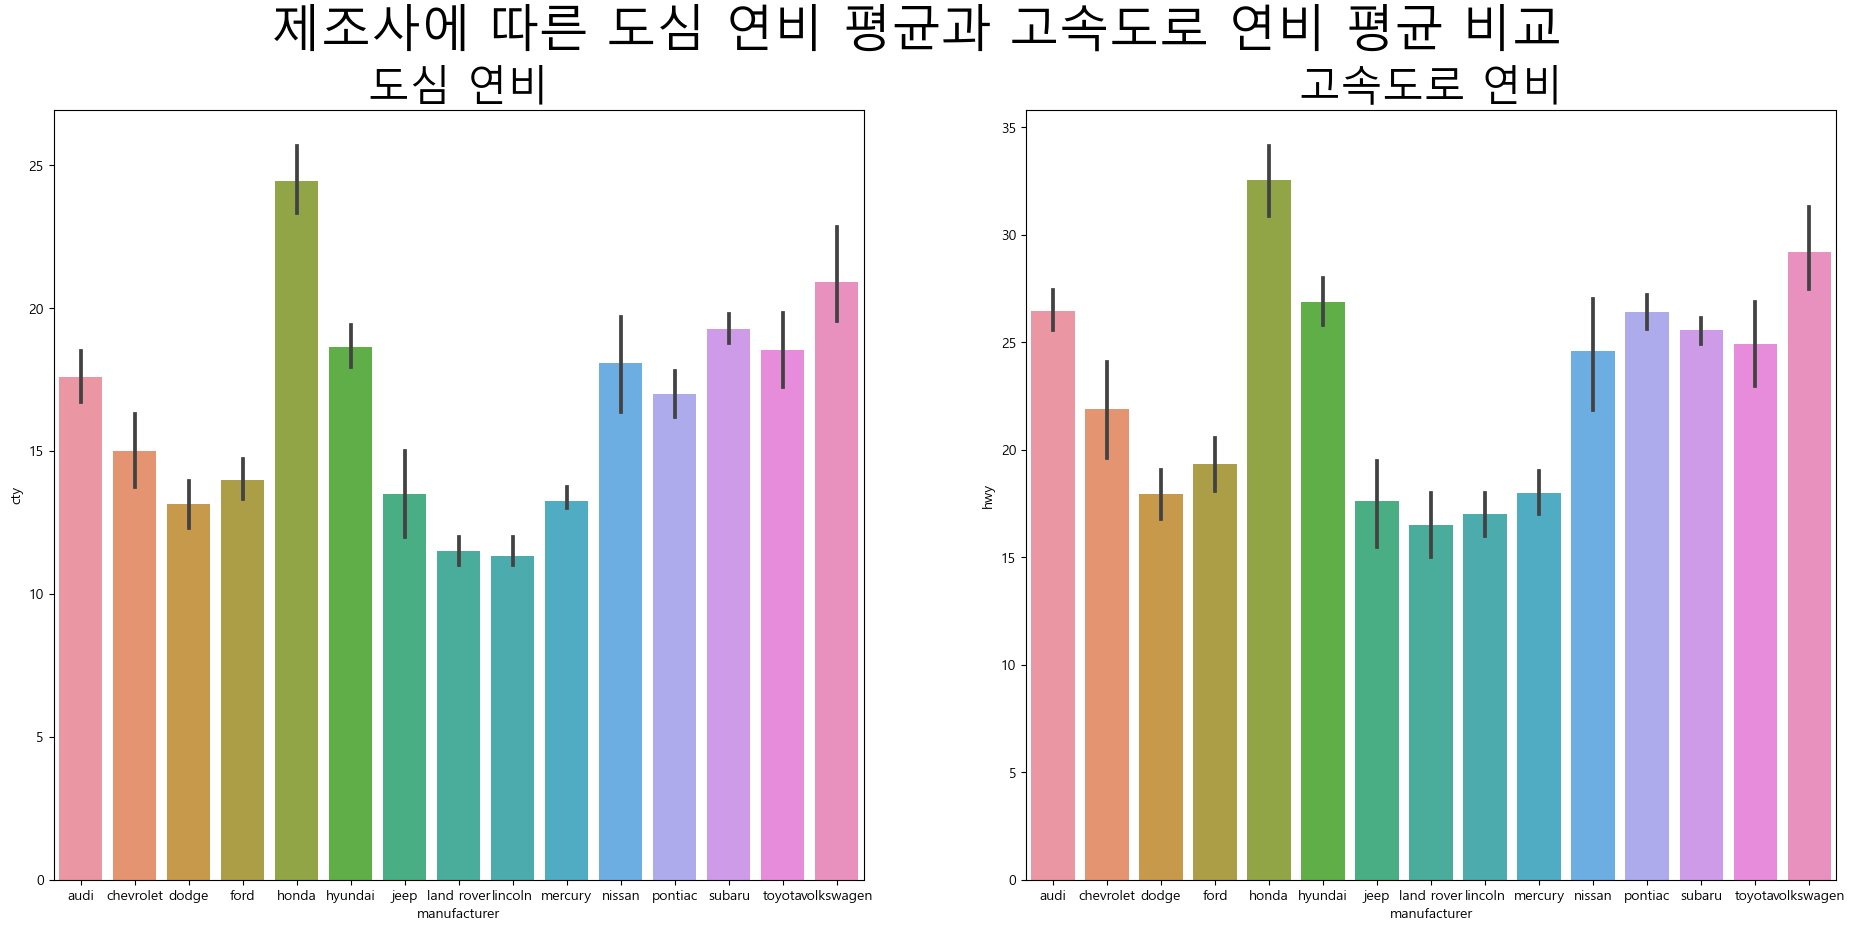

In [29]:
fig , (ax1, ax2) = plt.subplots(1, 2, figsize = (23,10))

fig.suptitle('제조사에 따른 도심 연비 평균과 고속도로 연비 평균 비교', fontsize = 36)
fig.subplots_adjust(wspace = 0.2, hspace = 0.3)

sb.barplot(data = df, x = 'manufacturer', y = 'cty' , estimator= 'mean', ax = ax1)
sb.barplot(data = df, x = 'manufacturer', y = 'hwy' , estimator= 'mean', ax = ax2)

ax1.title.set_text('도심 연비')
ax1.title.set_fontsize(30)

ax2.title.set_text('고속도로 연비')
ax2.title.set_fontsize(30)

plt.show()
plt.close()

# 문제 6. 

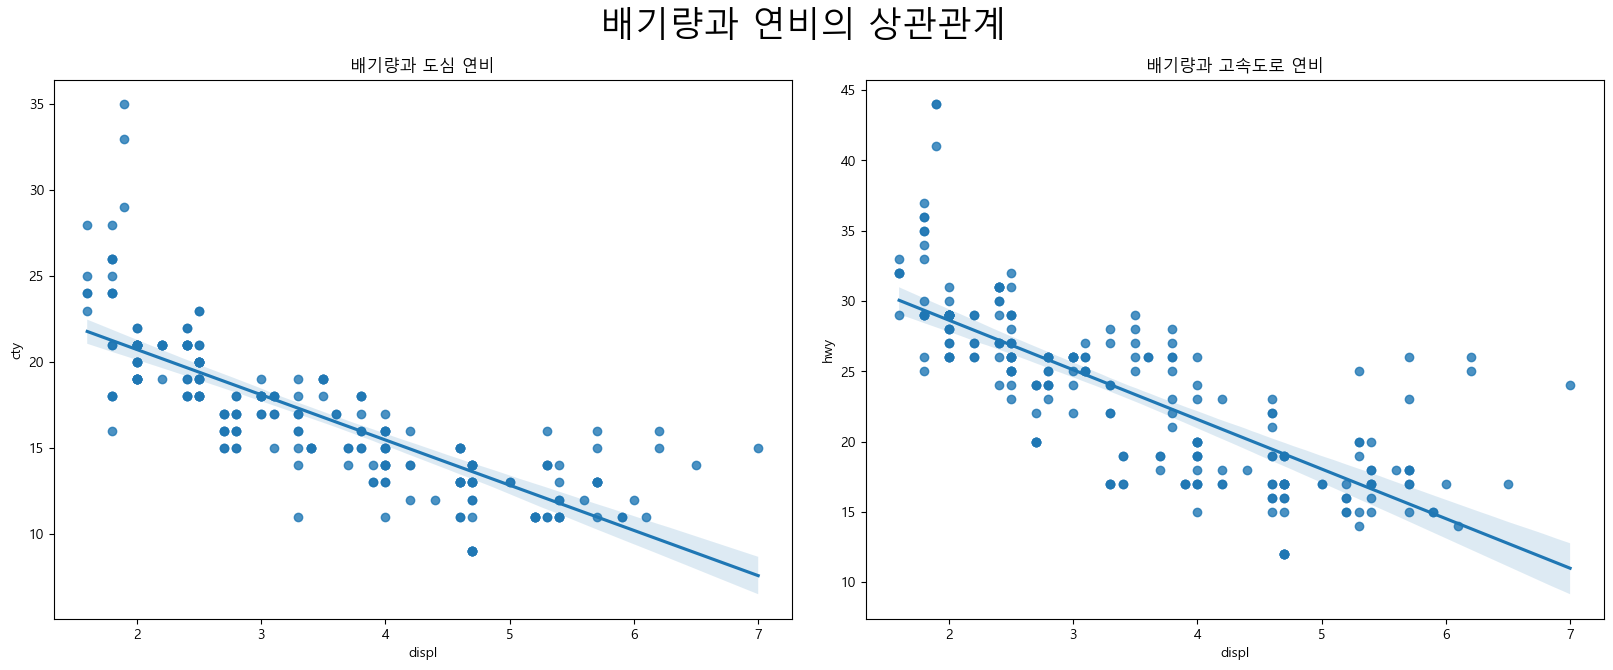

In [37]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 7))

fig.subplots_adjust(wspace=0.1)

fig.suptitle('배기량과 연비의 상관관계', fontsize=25)

sb.regplot(data = df,  x='displ', y='cty', ax = ax1)
sb.regplot(data = df, x='displ', y='hwy', ax = ax2)

ax1.title.set_text("배기량과 도심 연비")
ax2.title.set_text("배기량과 고속도로 연비")

plt.show()
plt.close()


# 문제 7.
        - 데이터 전처리 요구사항
        
        - 데이터 프레임에 평균연비에 대한 파생변수를 생성하시오.
        - 전체 평균연비에 대한 평균값을 구하고 이 평균값보다 평균연비가 높은 경우 'Pass', 그렇지 않을 - 경우 'Fail'로 표시할 수 있는 파생변수를 평가라는 이름으로 추가하시오.
        - 평균연비에 대한 백분율을 구한 후 90점 이상일 경우 A, 80점 이상일 경우 B, 70점 이상일 경우 
            C, 그 외의 경우는 D로 하여 등급이라는 컬럼을 추가하시오.
        
        * 다음의 네가지 지표를 확인할 수 있는 서브플롯을 제시하라

        - 자동차 구동방식별 평가에 대한 빈도
        - 자동차 구동방식별 등급에 대한 빈도
        - 자동차 연료 종류 평가에 대한 빈도
        - 자동차 연료 종류 등급에 대한 빈도
        - 자동차 분류별 평가에 대한 빈도
        - 자동차 분류별 등급에 대한 빈도
        - 평균연비는 고속도로연비와 도심연비에 대한 평균이다.

In [49]:
df['평균연비'] = df.loc[:, 'cty' : 'hwy'].mean(axis = 1)
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,평균연비
id,,,,,,,,,,,,
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0


In [54]:
fmean = df['평균연비'].mean()
fmean

20.14957264957265

In [55]:
df['평가'] = np.where(df['평균연비'] > fmean, 'Pass', 'Fail')
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,평균연비,평가
id,,,,,,,,,,,,,
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,Pass
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,Pass
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,Pass
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,Pass
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5,Pass
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0,Pass
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0,Pass


In [56]:
meansum = df['평균연비'].sum()
meansum

4715.0

In [60]:
df['연비효율'] = df['평균연비'] / fmean * 100
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,평균연비,평가,연비표율,연비효율
id,,,,,,,,,,,,,,,
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,Pass,116.627784,116.627784
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,Pass,124.072110,124.072110
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,Pass,126.553552,126.553552
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,Pass,126.553552,126.553552
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,Pass,104.220573,104.220573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5,Pass,116.627784,116.627784
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0,Pass,124.072110,124.072110
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0,Pass,104.220573,104.220573


In [61]:
조건 = [
    (df['연비효율'] >= 90),
    (df['연비효율'] >= 80),
    (df['연비효율'] >= 70)
]

값 = ['A', 'B', 'C']

df['등급'] = np.select(조건, 값, default='D')
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,평균연비,평가,연비표율,연비효율,등급
id,,,,,,,,,,,,,,,,
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,Pass,116.627784,116.627784,A
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,Pass,124.072110,124.072110,A
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,Pass,126.553552,126.553552,A
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,Pass,126.553552,126.553552,A
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,Pass,104.220573,104.220573,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5,Pass,116.627784,116.627784,A
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0,Pass,124.072110,124.072110,A
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0,Pass,104.220573,104.220573,A


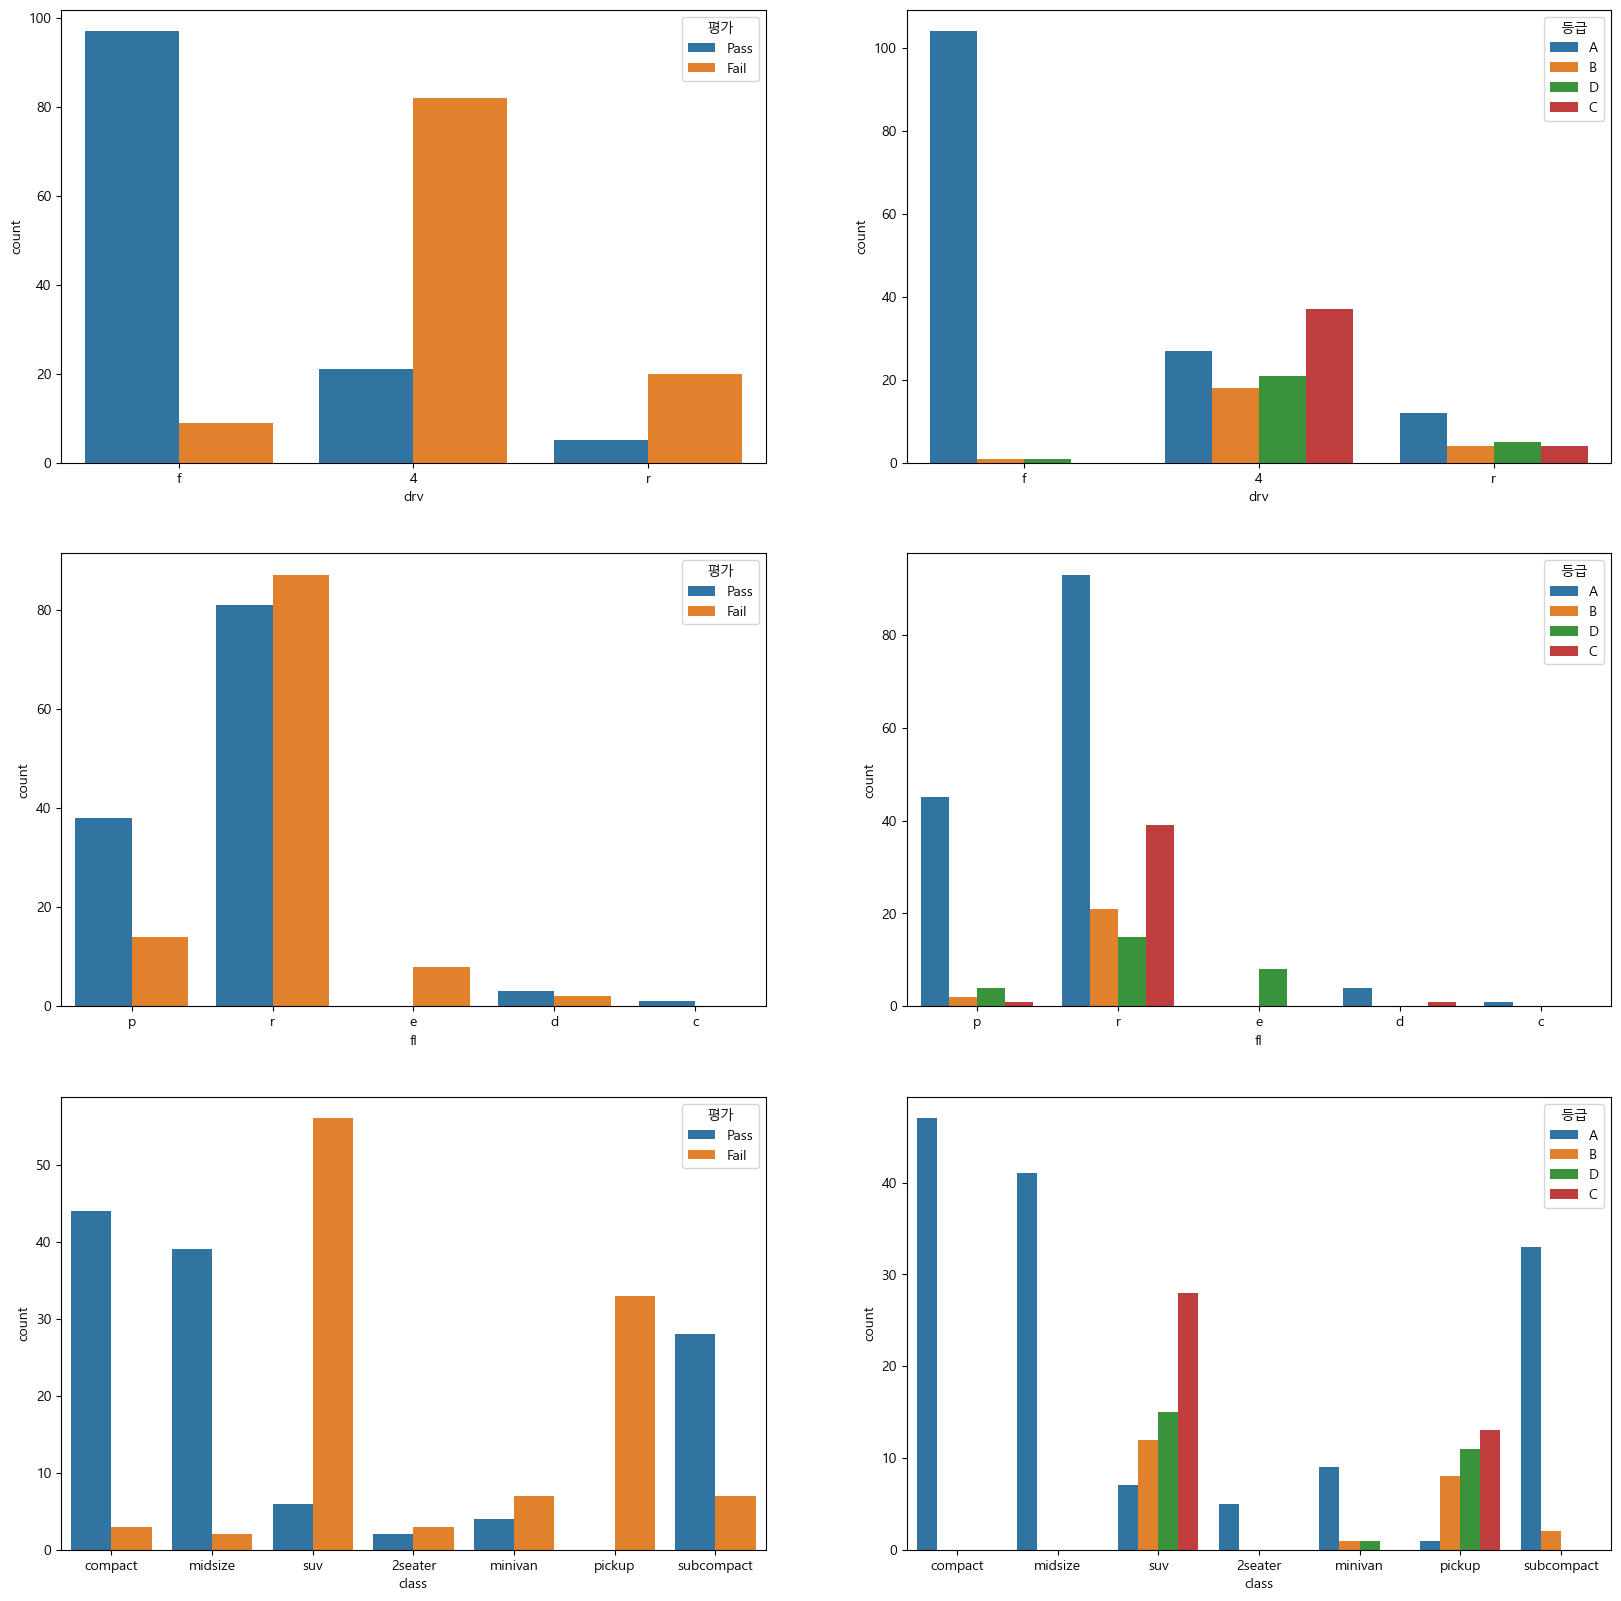

In [62]:

             # 1                 # 2                # 3
fig, ((ax11, ax12), (ax21, ax22), (ax31, ax32)) = plt.subplots(3, 2, figsize=(20, 20))
            #1 , 2           1        2          1      2
# 자동차 구동방식별 평가에 대한 빈도
sb.countplot(data=df, x='drv', hue='평가', ax=ax11)

# 자동차 구동방식별 등급에 대한 빈도
sb.countplot(data=df, x='drv', hue='등급', ax=ax12)

# 자동차 연료 종류 평가에 대한 빈도
sb.countplot(data=df, x='fl', hue='평가', ax=ax21)

# 자동차 연료 종류 등급에 대한 빈도
sb.countplot(data=df, x='fl', hue='등급', ax=ax22)

# 자동차 분류별 평가에 대한 빈도
sb.countplot(data=df, x='class', hue='평가', ax=ax31)

# 자동차 분류별 등급에 대한 빈도
sb.countplot(data=df, x='class', hue='등급', ax=ax32)

plt.show()
plt.close()